# Title

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Structure Overhaul](#data-structure-overhaul)
        - [Cleaning Headers](#cleaning-headers)
        - [Cleaning Column Elements](#cleaning-column-elements)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

In this analysis, I want to gauge social media user behavior and sentiment across various platforms to better understand social media users and how they interact on the platform. The Social Media Sentiments Analysis Dataset documents user interactions with one another through their posts, likes, and reshares across multiple social media platforms. This dataset is a snapshot of user-generated content consisting of text, sentiment, timestamps, usernames, platform used, hashtags, likes, reshares, and user country. 

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests

In [2]:
# Importing file for assignment
try:
    sm = pd.read_csv('sentimentdataset.csv')
except:
    sm = pd.read_csv('/datasets/sentimentdataset.csv')

[Back to Table of Contents](#back)

## Pre-Processing Data

In [3]:
sm.describe()
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


### Duplicates

In [4]:
# Checking for duplicates
sm.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [5]:
# Checking for null values
sm.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [6]:
# Looking at both of the numeric unnamed columns, it appears to look like a column 
# that was recording the index value and we can remove these columns.
sm['Unnamed: 0.1'].isin(sm['Unnamed: 0']).count()

732

In [7]:
# Removing columns we do not need for this analysis
sm = sm.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


[Back to Table of Contents](#back)

### Data Structure Overhaul

In [8]:
# Getting general information about the dataset
sm.info()
sm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


#### Cleaning Headers

In [9]:
#checking for snakecase format
sm.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [10]:
# Renaming column names to snake_case format
sm = sm.rename(columns={'Text': 'text',
                        'Sentiment': 'sentiment',
                        'Timestamp': 'timestamp',
                        'User': 'user',
                        'Platform': 'platform',
                        'Hashtags': 'hashtags',
                        'Retweets': 'reshared',
                        'Likes': 'likes',
                        'Country': 'country',
                        'Year': 'year',
                        'Month': 'month',
                        'Day': 'day',
                        'Hour': 'hour'})
sm.columns

Index(['text', 'sentiment', 'timestamp', 'user', 'platform', 'hashtags',
       'reshared', 'likes', 'country', 'year', 'month', 'day', 'hour'],
      dtype='object')

[Back to Table of Contents](#back)

#### Cleaning Column Elements

In [11]:
sm.tail()

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [12]:
# This function that converts object elements into snakecase format
def clean_col(col):
    col = col.lower()
    col = col.strip()
    col = col.rstrip()
    col = col.replace(' ', '_')
    col = col.replace('[^a-zA-Z0-9_]', '')
    return col

In [13]:
sm['text'].sample(5)

30      Weekend road trip to explore scenic views.   ...
520    At a Justin Bieber concert, the infectious bea...
223     Embracing life's imperfections, finding accep...
335    Thrilled to witness the grandeur of a cultural...
185     Helplessness engulfs me, drowning in a sea of...
Name: text, dtype: object

In [14]:
sm['text'] = sm['text'].apply(clean_col)
sm['text_len'] = sm['text'].str.len()
sm.tail()

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour,text_len
727,collaborating_on_a_science_project_that_receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,109
728,attending_a_surprise_birthday_party_organized_...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,105
729,successfully_fundraising_for_a_school_charity_...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,98
730,"participating_in_a_multicultural_festival,_cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,103
731,organizing_a_virtual_talent_show_during_challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15,96


In [15]:
sm['sentiment'].sample(5)

625       Contentment 
298        Loneliness 
401     Radiance      
487           Success 
90       Acceptance   
Name: sentiment, dtype: object

In [16]:
sm['sentiment'] = sm['sentiment'].apply(clean_col)
sm.tail()

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour,text_len
727,collaborating_on_a_science_project_that_receiv...,happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,109
728,attending_a_surprise_birthday_party_organized_...,happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,105
729,successfully_fundraising_for_a_school_charity_...,happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,98
730,"participating_in_a_multicultural_festival,_cel...",happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,103
731,organizing_a_virtual_talent_show_during_challe...,happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15,96


In [17]:
# For this analysis, we are going to reduce the number of values in the sentiment column to positive, neutral, 
# and negative to make it easier to read and filter since many of these values are expressing a form of both feelings.
pos_list = ['joy', 'excitement', 'contentment', 'gratitude', 'curiosity',
            'serenity', 'happy', 'nostalgia', 'awe', 'hopeful',
            'euphoria', 'enthusiasm', 'pride', 'elation', 'determination',
            'inspiration', 'playful', 'surprise', 'happiness', 'inspired',
            'hope', 'empowerment', 'admiration', 'compassionate', 'compassion',
            'proud', 'calmness', 'reverence', 'fulfillment', 'tenderness',
            'arousal', 'enchantment', 'grateful', 'thrill', 'confident',
            'kind', 'creativity', 'accomplishment', 'harmony', 'free-spirited',
            'empathetic', 'satisfaction', 'amusement', 'adventure', 'love',
            'enjoyment', 'exploration', 'adoration', 'zest', 'affection',
            'radiance', 'rejuvenation', 'resilience', 'coziness', 'whimsy',
            'captivation', 'tranquility', 'positivity', 'playfuljoy', 'overjoyed',
            'optimism', 'ocean\'s_freedom', 'nature\'s_beauty', 'relief', 'motivation',
            'amazement', 'mindfulness', 'mesmerizing', 'melodic', 'marvel',
            'kindness', 'joyfulreunion', 'joy_in_baking', 'intrigue', 'appreciation',
            'grandeur', 'artisticburst', 'iconic', 'imagination', 'renewed_effort',
            'runway_creativity', 'freedom', 'friendship', 'heartwarming', 'success',
            'blessed', 'engagement', 'festivejoy', 'thrilling_journey', 'touched',
            'triumph', 'vibrancy', 'winter_magic', 'breakthrough', 'celebration ',
            'energy', 'elegance', 'ecstasy', 'dreamchaser', 'dazzle',
            'culinaryodyssey', 'culinary_adventure', 'creative_inspiration', 'confidence', 'colorful',
            'charm', 'celebration', 'celestial_wonder', 'wonderment', 'positive',
            'romance']

neu_list = ['acceptance', 'indifference', 'ambivalence', 'reflection', 'anticipation',
            'wonder', 'emotion', 'contemplation', 'intimidation', 'adrenaline',
            'journey', 'innerjourney', 'hypnotic', 'immersion', 'bittersweet',
            'solitude', 'spark', 'suspense', 'envisioning_history', 'sympathy', 
            'emotionalstorm', 'whispers_of_the_past', 'connection', 'challenge', 'obstacle', 
            'neutral']

neg_list = ['despair', 'sad', 'grief', 'loneliness', 'embarrassed',
            'confusion', 'melancholy', 'numbness', 'frustration',
            'regret', 'hate', 'bad', 'disgust', 'betrayal',
            'bitterness', 'frustrated', 'desolation', 'boredom', 'overwhelmed',
            'jealousy', 'jealous', 'heartbreak', 'dismissive', 'fearful',
            'envious', 'resentment', 'bitter', 'shame', 'devastated', 
            'envy', 'loss', 'fear', 'helplessness', 'isolation',
            'mischievous', 'disappointed', 'sadness', 'sorrow', 'disappointment',
            'anxiety', 'apprehensive', 'yearning', 'anger', 'pensive',
            'miscalculation', 'lostlove', 'pressure', 'solace', 'ruins',
            'exhaustion', 'heartache', 'suffering', 'desperation', 'negative',
            'darkness']

def sentiment_func(value):
    if value in pos_list:
        return 'positive'
    if value in neu_list:
        return 'neutral'
    if value in neg_list:
        return 'negative'

sm['sentiment'] = sm['sentiment'].apply(sentiment_func)
sm['sentiment'] = sm['sentiment'].astype('category')
sm['sentiment'].value_counts()

positive    467
negative    195
neutral      70
Name: sentiment, dtype: int64

In [18]:
sm['timestamp'] = pd.to_datetime(sm['timestamp'], format='%Y-%m-%d %H:%M:%S')
sm['timestamp'].head()

0   2023-01-15 12:30:00
1   2023-01-15 08:45:00
2   2023-01-15 15:45:00
3   2023-01-15 18:20:00
4   2023-01-15 19:55:00
Name: timestamp, dtype: datetime64[ns]

In [19]:
sm['user'] = sm['user'].apply(clean_col)
sm['user'].head()

0       user123
1     commuterx
2    fitnessfan
3    adventurex
4      chefcook
Name: user, dtype: object

In [20]:
sm['platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: platform, dtype: int64

In [21]:
sm['platform'] = sm['platform'].apply(clean_col)
sm['platform'] = sm['platform'].astype('category')
sm['platform'].head()

0      twitter
1      twitter
2    instagram
3     facebook
4    instagram
Name: platform, dtype: category
Categories (3, object): ['facebook', 'instagram', 'twitter']

In [22]:
sm['hashtags'] = sm['hashtags'].apply(clean_col)
sm['hashtags'] = sm['hashtags'].str.replace('#', '')
sm['hashtags'].head()

0         nature_park
1     traffic_morning
2     fitness_workout
3    travel_adventure
4        cooking_food
Name: hashtags, dtype: object

In [23]:
hashtag = sm[['user', 'hashtags']]
hashtag.reset_index()

,index,user,hashtags
0,0,user123,nature_park
1,1,commuterx,traffic_morning
2,2,fitnessfan,fitness_workout
3,3,adventurex,travel_adventure
4,4,chefcook,cooking_food
...,...,...,...
727,727,scienceprojectsuccesshighschool,sciencefairwinner_highschoolscience
728,728,birthdaypartyjoyhighschool,surprisecelebration_highschoolfriendship
729,729,charityfundraisingtriumphhighschool,communitygiving_highschoolphilanthropy
730,730,multiculturalfestivaljoyhighschool,culturalcelebration_highschoolunity


In [24]:
# Splitting the salary column values into a min salary column and a max salary column
new_hashtag = hashtag['hashtags'].str.split('_', n=1, expand=True)

hash_list = new_hashtag[0].to_list() + new_hashtag[1].to_list()
hash_df = pd.DataFrame(hash_list, columns=['hashtags'])
hash_df.value_counts().head(10)

hashtags   
serenity       15
gratitude      13
excitement     13
nostalgia      11
despair        11
curiosity      10
contentment    10
grief           9
loneliness      9
awe             9
dtype: int64

In [25]:
sm['country'] = sm['country'].apply(clean_col)
sm['country'].head()

0          usa
1       canada
2          usa
3           uk
4    australia
Name: country, dtype: object

In [26]:
sm['reshared'] = sm['reshared'].astype('int')
sm['likes'] = sm['likes'].astype('int')
sm['year'] = sm['year'].astype('int')
sm['month'] = sm['month'].astype('int')
sm['day'] = sm['day'].astype('int')

In [27]:
sm.info()
sm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   text       732 non-null    object        
 1   sentiment  732 non-null    category      
 2   timestamp  732 non-null    datetime64[ns]
 3   user       732 non-null    object        
 4   platform   732 non-null    category      
 5   hashtags   732 non-null    object        
 6   reshared   732 non-null    int32         
 7   likes      732 non-null    int32         
 8   country    732 non-null    object        
 9   year       732 non-null    int32         
 10  month      732 non-null    int32         
 11  day        732 non-null    int32         
 12  hour       732 non-null    int64         
 13  text_len   732 non-null    int64         
dtypes: category(2), datetime64[ns](1), int32(5), int64(2), object(4)
memory usage: 56.1+ KB


,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour,text_len
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,nature_park,15,30,usa,2023,1,15,12,37
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,traffic_morning,5,10,canada,2023,1,15,8,34
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,fitness_workout,20,40,usa,2023,1,15,15,35
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,travel_adventure,8,15,uk,2023,1,15,18,43
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,cooking_food,12,25,australia,2023,1,15,19,43


[Back to Table of Contents](#back)

## Exploratory Data Analysis

### What are social media users’ preferred methods of engagement?

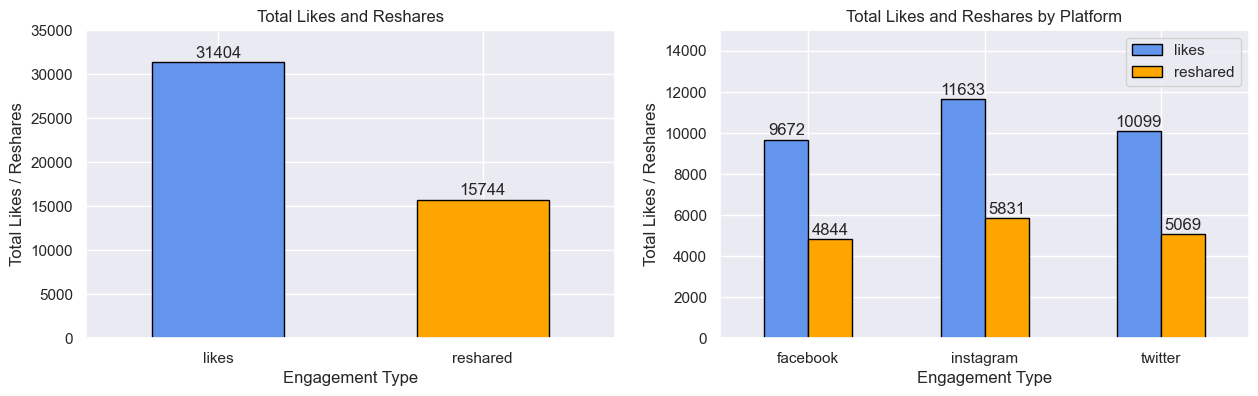

In [28]:
# 
sns.set_theme(style='darkgrid')
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

# Creating a bar plot with total likes and reshares
plt.subplot(1, 2, 1)
sum_engagement = sm.agg({'likes': 'sum',
                         'reshared': 'sum'}).plot(kind='bar',
                                                  color=['cornflowerblue', 'orange'],
                                                  edgecolor='black',
                                                  ax=axis1)

for r in sum_engagement.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    sum_engagement.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')
plt.title('Total Likes and Reshares')
plt.xlabel('Engagement Type')
plt.xticks(rotation=360)
plt.ylabel('Total Likes / Reshares')
plt.ylim([0, 35000])


plt.subplot(1, 2, 2)
platform_engagement = sm.groupby('platform').agg({'likes': 'sum',
                                                  'reshared': 'sum'}).plot(kind='bar',
                                                                           color=['cornflowerblue', 'orange'],
                                                                           edgecolor='black',
                                                                           ax=axis2)

for r in platform_engagement.patches:
    y_value = r.get_height()
    x_value = r.get_x() + r.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    platform_engagement.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')
plt.title('Total Likes and Reshares by Platform')
plt.xlabel('Engagement Type')
plt.xticks(rotation=360)
plt.ylabel('Total Likes / Reshares')
plt.ylim([0, 15000])

plt.show()

Across all social media platforms, likes are the preferred engagement method for social media users. The reshared engagement method is used 50% less than the likes method and this 2 to 1 ratio also occurs across all social media platforms. 
However, likes engagement only indicates positive sentiment whereas reshared can be perceived as positive or negative. Additionally due to the scarcity of reshared engagement, reshares can be viewed as a more fervent form of engagement displaying the user's intense feelings towards a post. If users have a stronger feeling towards a post, positive or negative, then they are more likely to reshare the post to other users.

[Back to Table of Contents](#back)

### What is the most common sentiment type in a post? Does post sentiment change on different platforms?

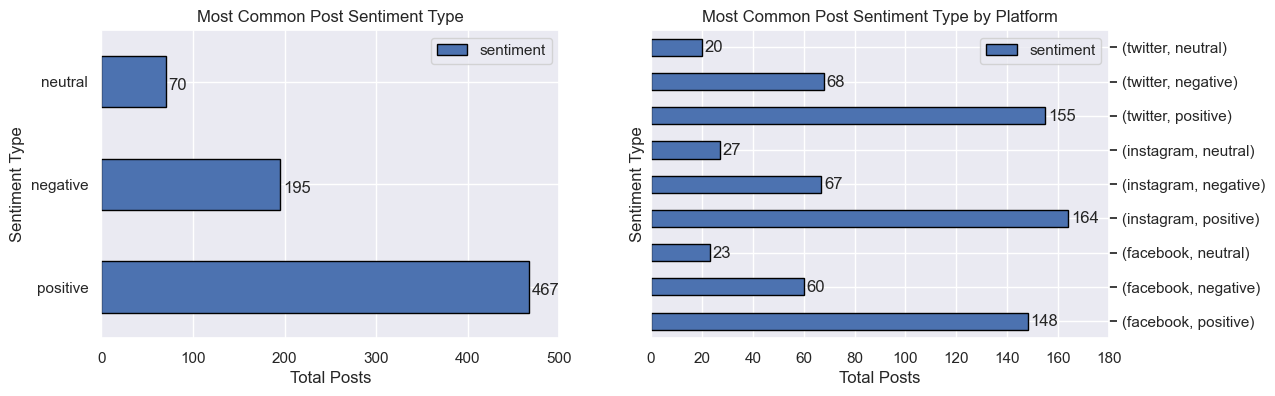

In [29]:
# 
sns.set_theme(style='darkgrid')
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(13, 4))

# Creating a bar plot with total likes and reshares
plt.subplot(1, 2, 1)
sentiment_type = sm.agg({'sentiment': 'value_counts'}).plot(kind='barh',
                                                            edgecolor='black',
                                                            ax=axis1)

for rect in sentiment_type.patches:
    y_value = rect.get_y() + (rect.get_height() - 0.1) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    sentiment_type.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center') 
plt.title('Most Common Post Sentiment Type')
plt.xlabel('Total Posts')
plt.xlim([0, 500])
plt.ylabel('Sentiment Type')


plt.subplot(1, 2, 2)
platform_sentiment = sm.groupby('platform').agg({'sentiment': 'value_counts'}).plot(kind='barh',
                                                                                    edgecolor='black',
                                                                                    ax=axis2)

for rect in platform_sentiment.patches:
    y_value = rect.get_y() + (rect.get_height() - 0.1) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    platform_sentiment.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center') 
plt.title('Most Common Post Sentiment Type by Platform')
plt.xlabel('Total Posts')
plt.xlim([0, 180])
plt.ylabel('Sentiment Type')
plt.tick_params(axis='y',
                left=False,
                right=True,
                labelleft=False,
                labelright=True)

plt.show()

Based on the data posts with positive sentiment are the most common posts overall regardless of which social media platform was used. Posts with negative sentiments appear about 50% less frequently than positive posts and posts with neutral sentiments have about 50-60% less than negative posts.

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

### 

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

syntax:
[Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [Kaggle](URL of the dataset).

example:
Tatman, R. (2017, November). R vs. Python: The Kitchen Gadget Test, Version 1. Retrieved December 20, 2017 from https://www.kaggle.com/rtatman/r-vs-python-the-kitchen-gadget-test.

[Back to Table of Contents](#back)